In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

print(tf.__version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab.output import eval_js
eval_js('google.colab.output.setIframeHeight("100")')

!unzip "/content/drive/MyDrive/Plant Disease Classification/data_splits.zip" -d "/content/"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/data_splits/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1333).JPG  
  inflating: /content/data_splits/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (5221).JPG  
  inflating: /content/data_splits/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1534).JPG  
  inflating: /content/data_splits/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3682).JPG  
  inflating: /content/data_splits/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (2466).JPG  
  inflating: /content/data_splits/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1730).JPG  
  inflating: /content/data_splits/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (4602).JPG  
  inflating: /content/data_splits/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (2347).JPG  
  inflating: /content/data_splits/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (2148).JPG  
  inflating: /content/data_splits/train/Tomato___Tomato_Yellow_Leaf_Cur

In [ ]:
model_path = '/content/drive/MyDrive/Plant Disease Classification/model/test/trained_models/inception_v3_mixed7.h5'

model = tf.keras.models.load_model(model_path)

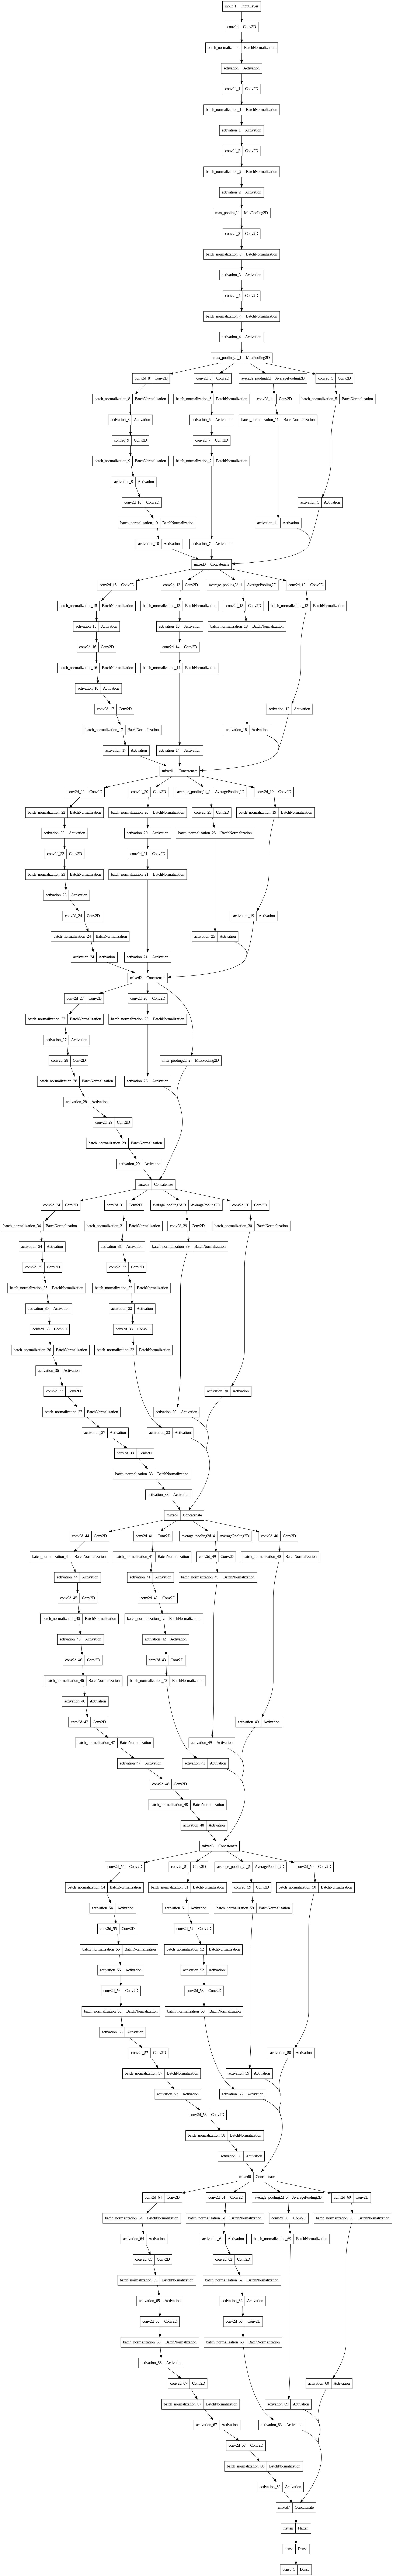

In [ ]:
tf.keras.utils.plot_model(model, '/content/drive/MyDrive/EE468 Project/model/test/model_TB.png', rankdir='TB')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
class_labels = []  # List of class labels
for label in os.listdir("/content/data_splits/test"):
  class_labels.append(label)

In [ ]:
import numpy as np
img_path = "/content/data_splits/test/Apple___Apple_scab/image (101).JPG"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256))
x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.keras.applications.inception_v3.preprocess_input(x)
x = np.expand_dims(x, axis=0)

# Make predictions
predictions = model.predict(x)
predicted_class = np.argmax(predictions[0])
confidence = predictions[0][predicted_class]

# Interpret the results
predicted_label = class_labels[predicted_class]

print('Predicted class:', predicted_label)
print('Confidence:', confidence)

1/1 [==============================] - 0s 309ms/step
Predicted class: Grape___healthy
Confidence: 1.0


In [ ]:
predictions

array([[1.0000000e+00, 1.2381663e-02, 9.9863905e-01, 8.4967983e-01,
        1.6914858e-07, 1.0064592e-09, 9.9997455e-01, 8.6812321e-11,
        3.0839310e-06, 1.1936364e-10, 8.5994427e-04, 7.4323742e-20,
        3.0931851e-04, 1.4370372e-06, 1.0000000e+00, 7.9312431e-06,
        5.9168788e-15, 9.8992145e-01, 8.5916769e-17, 1.4547043e-05,
        1.2615022e-12, 9.9998724e-01, 9.9974304e-01, 5.3917883e-08,
        1.2790595e-04, 6.6387215e-06, 3.1029493e-01, 9.9644935e-01,
        5.9807113e-05, 2.7115332e-04, 3.3574599e-01, 9.8541474e-01,
        2.3169327e-01, 9.9998385e-01, 1.1357596e-05, 6.2366235e-03,
        5.2198098e-04, 1.0624474e-12, 1.0317382e-10]], dtype=float32)